In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from geopy.geocoders import Nominatim

In [2]:
data=pd.read_csv("kaggle_survey_2022_responses.csv")
data.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9244\3012350019.py:1: DtypeWarning: Columns (0,15,43,57,73,88,104,118,126,132,170,200,208,215,225,248,255,257,260,270,271,272,277,281,294) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("kaggle_survey_2022_responses.csv")


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [3]:
df=data.copy()
df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


# data cleaning and formatting

In [4]:
df.columns = df.iloc[0]         #change column names to the first row of dataframe at index 0
df.drop(0,inplace = True)       # drop the first row and reset index
df.reset_index(drop=True, inplace=True)
df.head()


,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,...,"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (notebooks, forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, Coursera forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Analytics Vidhya, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (peer-reviewed journals, conference proceedings, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)",Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - None,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other
0,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [5]:
df_colname = pd.read_excel('column_rename.xlsx')
df

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,...,"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (notebooks, forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, Coursera forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Analytics Vidhya, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (peer-reviewed journals, conference proceedings, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)",Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - None,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other
0,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,331,22-24,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
23993,330,60-69,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23994,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23995,597,35-39,Woman,Israel,No,NaN,NaN,Kaggle 

In [6]:
df.columns = df_colname['Column names']
df

Column names,duration(sec),age,gender,current_residential_country,student_yes__no,ds_platform_coursera,ds_platform_edX,ds_platform_kaggle_learn_courses,ds_platform_datacamp,ds_platfor_fast.ai,...,fav_media_reddit,fav_media_kaggle,fav_media_course_forums,fav_media_youtube,fav_media_podcasts,fav_media_blogs,fav_media_journal,fav_media_slack,fav_media_none,fav_media_other
0,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,331,22-24,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
23993,330,60-69,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23994,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23995,597,35-39,Woman,Israel,No,NaN,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum().sum()   #sum of missing values for all columns

6216551

<Axes: xlabel='Column names'>

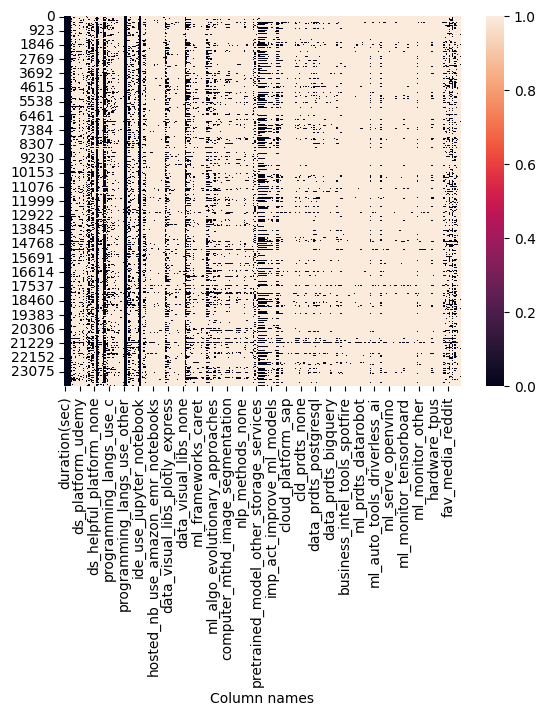

In [8]:
# heatmap
sns.heatmap(df.isnull())
# missing data in heatmap


In [9]:
df[df.isnull().any(axis=1)] #show NaN values in dataframe

Column names,duration(sec),age,gender,current_residential_country,student_yes__no,ds_platform_coursera,ds_platform_edX,ds_platform_kaggle_learn_courses,ds_platform_datacamp,ds_platfor_fast.ai,...,fav_media_reddit,fav_media_kaggle,fav_media_course_forums,fav_media_youtube,fav_media_podcasts,fav_media_blogs,fav_media_journal,fav_media_slack,fav_media_none,fav_media_other
0,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,331,22-24,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
23993,330,60-69,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23994,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23995,597,35-39,Woman,Israel,No,NaN,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df[df.duplicated()]                   #check duplicate values in dataframe

Column names,duration(sec),age,gender,current_residential_country,student_yes__no,ds_platform_coursera,ds_platform_edX,ds_platform_kaggle_learn_courses,ds_platform_datacamp,ds_platfor_fast.ai,...,fav_media_reddit,fav_media_kaggle,fav_media_course_forums,fav_media_youtube,fav_media_podcasts,fav_media_blogs,fav_media_journal,fav_media_slack,fav_media_none,fav_media_other


In [11]:
df.drop_duplicates(inplace=True)           #drop duplicate in dataframe

In [12]:
df[df.duplicated()]

Column names,duration(sec),age,gender,current_residential_country,student_yes__no,ds_platform_coursera,ds_platform_edX,ds_platform_kaggle_learn_courses,ds_platform_datacamp,ds_platfor_fast.ai,...,fav_media_reddit,fav_media_kaggle,fav_media_course_forums,fav_media_youtube,fav_media_podcasts,fav_media_blogs,fav_media_journal,fav_media_slack,fav_media_none,fav_media_other


In [13]:
df.shape

(23997, 296)

# invalid values

In [14]:
df.dtypes

Column names
duration(sec)                  object
age                            object
gender                         object
current_residential_country    object
student_yes__no                object
                                ...  
fav_media_blogs                object
fav_media_journal              object
fav_media_slack                object
fav_media_none                 object
fav_media_other                object
Length: 296, dtype: object

As can see, all columns are for datatype object that is maily string values. But after carefully reading dataset, there are three columns available in dataset "duration(sec)" "yearly_income" and "money_spent" that contain all numeric values so there datatype should be integer or float.
The main reason that why we need to change the data types because on string values we can not perforom mathematical formulas and calculations.

 change the data type of columns "duration(sec)", "yearly_income", "money_spent" from string to numeric.

In [15]:
df['duration(sec)']=df['duration(sec)'].astype('int64')
df['duration(sec)'].dtypes


dtype('int64')

In [16]:
df[["yearly_income","money_spent",'duration(sec)']]

Column names,yearly_income,money_spent,duration(sec)
0,NaN,NaN,121
1,NaN,NaN,462
2,NaN,NaN,293
3,"25,000-29,999","$1000-$9,999",851
4,NaN,NaN,232
...,...,...,...
23992,NaN,NaN,331
23993,NaN,NaN,330
23994,"25,000-29,999",$100-$999,860
23995,"15,000-19,999",$0 ($USD),597


 there are values present in range format for yearly_income and money_spent. now we will format these values in two different columns 
so that it would be easy to perform calculations on these columns.

In [17]:
for col in ['yearly_income','money_spent']:
    df=df.join(
       df[col] 
       .str.replace(",","",regex=False)
        .str.extract(pat=r"^[$]*(\d+)[-\s$]*(\d+)$")
        .astype("float64")
        .rename({0: f"{col}_lower", 1: f"{col}_upper"}, axis="columns")
    ) 

In [18]:
df   #dataset after new columns 

,duration(sec),age,gender,current_residential_country,student_yes__no,ds_platform_coursera,ds_platform_edX,ds_platform_kaggle_learn_courses,ds_platform_datacamp,ds_platfor_fast.ai,...,fav_media_podcasts,fav_media_blogs,fav_media_journal,fav_media_slack,fav_media_none,fav_media_other,yearly_income_lower,yearly_income_upper,money_spent_lower,money_spent_upper
0,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,"Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,25000.0,29999.0,1000.0,9999.0
4,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,331,22-24,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,"Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
23993,330,60-69,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23994,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,29999.0,100.0,999.0
23995,597,35-39,Woman,Israel,No,NaN,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,19999.0,NaN,NaN


# --check if there is any negative values in dataset

In [19]:
numcol=df.select_dtypes(include=['float64','int64']).columns
It=list()
for i in numcol:
    y=any(x<0 for x in df[i])
    if y==True:
        It.append(i)

print('there are {} negative value'.format(len(It)))

there are 0 negative value


In [20]:


# Check for negative values in the 'column_name' column
has_negative = any(df['yearly_income_upper'] < 0)

if has_negative:
    print(f"The 'column_name' column contains negative values.")
else:
    print(f"The 'column_name' column does not contain any negative values.")

The 'column_name' column does not contain any negative values.


In [21]:
df.describe()

,duration(sec),yearly_income_lower,yearly_income_upper,money_spent_lower,money_spent_upper
count,2.399700e+04,8113.000000,8113.000000,5476.000000,5476.000000
mean,1.009010e+04,46454.948848,61092.491927,1183.025749,11853.072316
std,1.115403e+05,66977.644350,105637.239226,2763.950785,27629.348036
min,1.200000e+02,0.000000,999.000000,1.000000,99.000000
25%,2.640000e+02,3000.000000,3999.000000,1.000000,99.000000
50%,4.140000e+02,20000.000000,24999.000000,100.000000,999.000000
75%,7.150000e+02,70000.000000,79999.000000,1000.000000,9999.000000
max,2.533678e+06,500000.000000,999999.000000,10000.000000,99999.000000


In [22]:
# minimum and maximum values of yearly_income
print(df['yearly_income_upper'].min())
print(df['yearly_income_upper'].max())

999.0
999999.0


In [23]:
original_shape = data.shape
modified_shape = df.shape
print(f'There are {modified_shape[0]} rows out of original {original_shape[0]} rows and {modified_shape[1]} columns out of  {original_shape[1]} columns in kaggle survey 2022 dataset')


There are 23997 rows out of original 23998 rows and 300 columns out of  296 columns in kaggle survey 2022 dataset


# data visualization

Before visualization process, let's define some color palletes using seaborn 

In [24]:
# color palletes to use in different visuals 
colors_muted = sns.color_palette('muted')[0:5]
colors_pastel = sns.color_palette('pastel')[0:5]
colors_bright = sns.color_palette('bright')[0:5]
colors_hls = sns.color_palette("hls", 8)
colors_paired = sns.color_palette("Paired")


# EDA(Exploratory Data Analysis)

In EDA, here we will perform <b>Descriptive analysis</b> where we will find some interesting fact about survey data.

<b>Q1- Maximum, minimum and average time duration for survey<b>

In [25]:
max_duration = df["duration(sec)"].max()   #maximum survey response time
min_duration = df["duration(sec)"].min()     #minimum urvey response time
avg_duration = df["duration(sec)"].mean()    #average survey response time

print(f'Maximum time taken by repondents for survey is {max_duration} sec and minimum time is {min_duration} sec')
print(f'Average time for survey response is {round(avg_duration,2)}sec')


Maximum time taken by repondents for survey is 2533678 sec and minimum time is 120 sec
Average time for survey response is 10090.1sec


In [26]:
def convert(seconds):
    min, sec = divmod(seconds, 60)
    hour, min = divmod(min, 60)
    return '%d:%02d:%02d' % (hour, min, sec)

In [27]:
# total time for survey
convert(avg_duration)

'2:48:10'

So, Average time taken by Responders for survey is "Two Hours and fourty eight minutes (2hours 48 minutes)"

<b> Q2 - No. of Respondents by age group </b>

In [28]:
age_respondents = df["age"].value_counts()
age_respondents

age
18-21    4559
25-29    4472
22-24    4283
30-34    2972
35-39    2353
40-44    1927
45-49    1253
50-54     914
55-59     611
60-69     526
70+       127
Name: count, dtype: int64

create a plot for the above observation using matplotlib library

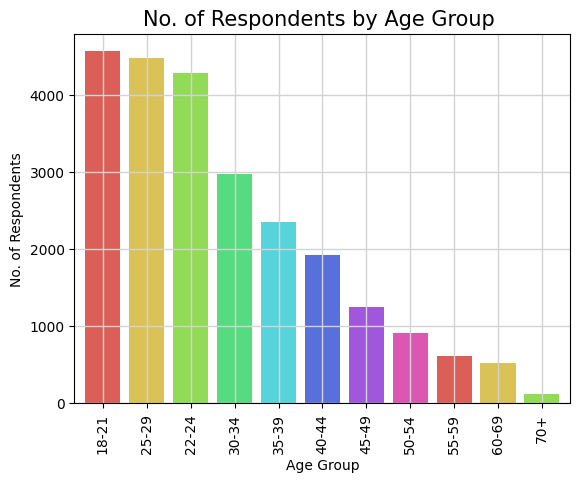

In [29]:
age_respondents.plot(kind='bar',color=colors_hls,width=0.8)
plt.xlabel("Age Group", color = 'black')
plt.ylabel("No. of Respondents", color = 'black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.title("No. of Respondents by Age Group ", fontsize = 15)
plt.grid(color='lightgray', linestyle='-', linewidth=1)

<b>Q3 - Respondents By Gender ratio </b>

In [30]:
gender_respondant=df['gender'].value_counts()
gender_respondant

gender
Man                        18266
Woman                       5286
Prefer not to say            334
Nonbinary                     78
Prefer to self-describe       33
Name: count, dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9244\2592093413.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(gender, title = "Gender Ratio", loc = "center right", bbox_to_anchor =(1.3, 0, 0.5, 1), labels = labels)


Text(0.5, 1.0, 'Respondents By Gender')

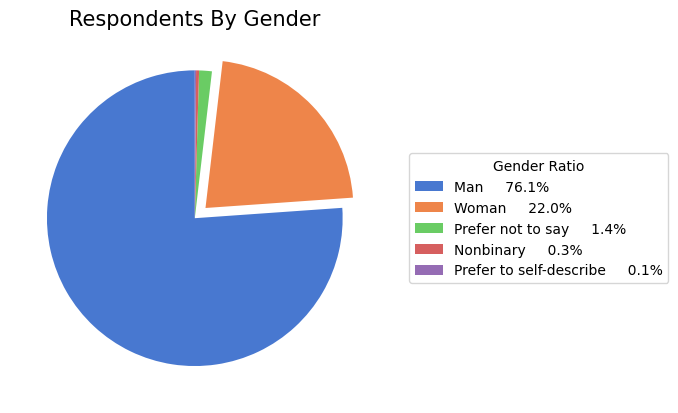

In [31]:
gender = ['Man', 'Woman', 'Prefer not to say','Nonbinary', 'Prefer to self-describe']
size = list()
for i in gender_respondant.values:
    pct =  i/gender_respondant.values.sum()*100
    size.append(pct)
plt.pie(size, colors = colors_muted, startangle = 90,explode = (0,0.1,0,0,0))
labels = [f'{l}     {s:0.1f}%' for l, s in zip(gender, size)]
plt.legend(gender, title = "Gender Ratio", loc = "center right", bbox_to_anchor =(1.3, 0, 0.5, 1), labels = labels)
plt.title("Respondents By Gender", fontsize= 15)

As we can see from Pie Chart, Maximun number of people who respond in survey were Men and there is large difference between 
the ratio of men and woman respondents. 

Now let's try to visualize only Men vs Women ratio

In [32]:
men_women = list()
for i in df["gender"]:
    if i == "Man" or i =="Woman":
        men_women.append(i)
men_women_count = Counter(men_women).values()         #"Counter() from "collection" module to count occurences of each values i.e. "Man" and "woman"

print(men_women_count)

dict_values([18266, 5286])


Text(0.5, 1.0, 'Man vs Woman Responders')

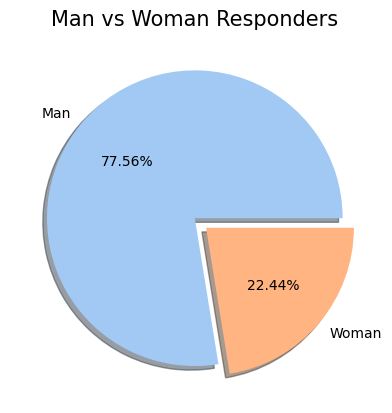

In [35]:
# plot a pie chart for men vs women respondent ratio
label = ["Man", "Woman"]
plt.pie(men_women_count, autopct = '%.2f%%', labels = label, colors = colors_pastel, explode = (0, 0.1),shadow = True) 
plt.title("Man vs Woman Responders", fontsize= 15)

<b> Q4-No. of Respondents By country</b>

To find the no. of survey responders, let's extract value counts for each country from kaggle dataframe

In [43]:
country_responder = pd.DataFrame(df["current_residential_country"].value_counts())
country_count = country_responder.reset_index()
country_count.columns = ['country', 'count']
country_count


,country,count
0,India,8792
1,United States of America,2920
2,Other,1430
3,Brazil,833
4,Nigeria,731
5,Pakistan,620
6,Japan,556
7,China,453
8,Egypt,383
9,Mexico,380


<b>Top 5 Countries With Highest numbers of Responders<b>

Text(0, 0.5, 'Country')

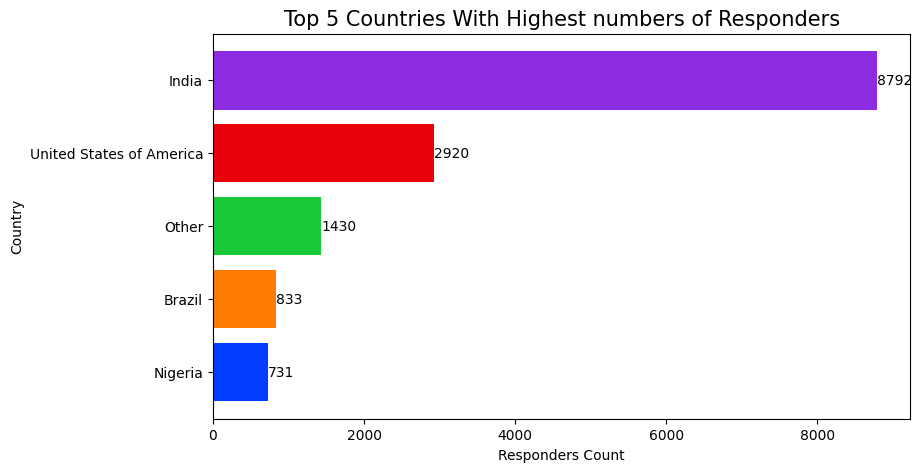

In [59]:
top5_country = country_count.head(5).sort_values('count',ascending = True)
fig,ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(9)
bars = ax.barh(top5_country['country'],top5_country['count'],  color = colors_bright)
ax.bar_label(bars, color='black')
plt.title('Top 5 Countries With Highest numbers of Responders', fontsize = 15)
plt.xlabel('Responders Count', color = 'black')
plt.ylabel('Country', color = 'black')


In [63]:
# function convert to alpha2 conutry code:
from pycountry_convert import  country_name_to_country_alpha2
def get_alpha(col,cn_a2_code):
    for i in col:
        try:
            cn_a2_code.append(country_name_to_country_alpha2(i))
        except:
            cn_a2_code.append('Unknown')
    return(cn_a2_code)



In [64]:
country_code=list()
country_code_a2=get_alpha(country_count['country'],country_code)
country_count['code_alpha2'] = country_code_a2
country_count

c:\ProgramData\miniconda3\envs\python_eda\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
c:\ProgramData\miniconda3\envs\python_eda\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


,country,count,code_alpha2
0,India,8792,IN
1,United States of America,2920,US
2,Other,1430,Unknown
3,Brazil,833,BR
4,Nigeria,731,NG
5,Pakistan,620,PK
6,Japan,556,JP
7,China,453,CN
8,Egypt,383,EG
9,Mexico,380,MX


Now let's find the latitude and longitude of countries using python's geopy.

In [67]:
#function to get longitude and latitude data from country name
geolocator = Nominatim(user_agent="kaggle_insights")

def geolocate(country,long_list,lat_list):
    for i in country:
        try:
        # Geolocate the center of the country
            loc = geolocator.geocode(i)
        # And return latitude and longitude
            long_list.append(loc.longitude)
            lat_list.append(loc.latitude)
           
        except:
        # Return missing value
             long_list.append(np.nan)
             lat_list.append(np.nan)
    return ( long_list, lat_list)